In [35]:
import pandas
import matplotlib.pyplot as plt
import sklearn
import random
import collections

In [36]:
# path = '../data/flats_29August2021.csv'
path = '../data/flats_03October.csv'

df = pandas.read_csv(path, sep=';')
print(df.head())

columns = ['price_id', 'flat_id', 'price', 'date', 'ad_id', \
    'title', 'date_posted', 'date_scraped', 'location', 'seller', \
    'property_type', 'num_rooms', 'num_bathrooms', 'flat_area',  \
    'text', 'description', 'photos_links', 'page_address']

num_columns = ['price', 'date', \
    'title', 'date_posted', 'date_scraped', 'location', 'seller', \
    'property_type', 'num_rooms', 'num_bathrooms', 'flat_area',  \
    'text', 'description']


   price_id    flat_id    price        date      ad_id  \
0         1  247741867  2290000  2021-01-22  247741867   
1         2  335769299   690000  2021-01-22  335769299   
2         3  426220306   860000  2021-01-26  426220306   
3         4  441050757  2157000  2021-01-20  441050757   
4         5  468323060   390000  2021-01-18  468323060   

                                               title date_posted date_scraped  \
0            Stara Saska Kępa, wyjątkowy apartament   2018-07-01   2021-01-22   
1                       Tarchomin - 104m2 - 5 pokoi   2018-10-26   2021-01-22   
2  Na sprzedaż, 3 pokoje na Woli przy rondzie ONZ...  2019-02-12   2021-01-26   
3                     Apartament w Centrum Warszawy   2019-03-01   2021-01-20   
4     Nowa kawalerka do wprowadzenia w chmurach 15p   2019-04-04   2021-01-18   

                   location      seller property_type  num_rooms  \
0  Praga Południe, Warszawa     Agencja    Mieszkanie          6   
1       Białołęka, Warszawa 

In [37]:
df = df[num_columns]

df = df.loc[df['flat_area'] < 300]
df = df.loc[df['price'] < 4500000]

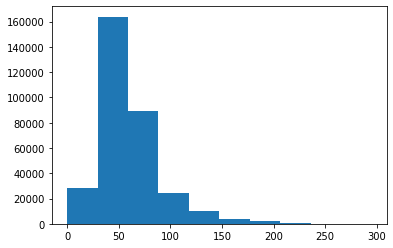

In [38]:
plt.hist(df['flat_area'])
plt.show()

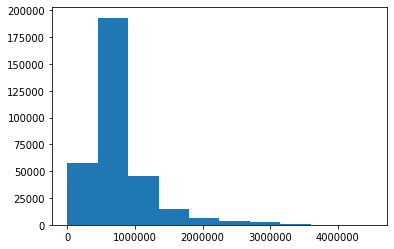

In [39]:
plt.hist(df['price'])
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

In [40]:
## How other variables relate with our target variable

corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
flat_area        0.824480
num_rooms        0.579191
num_bathrooms    0.337966
Name: price, dtype: float64

# Patodeweloperka EDA

In [51]:
df_small = df.loc[(df['flat_area'] < 27) & (10 < df['flat_area'])]
df_small['price_per_m2'] = df_small['price']/df_small['flat_area']
len(df_small)

/var/folders/6s/dz8bggdn2cvbxr_txvltwrz00000gn/T/ipykernel_3453/1046365221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['price_per_m2'] = df_small['price']/df_small['flat_area']


17846

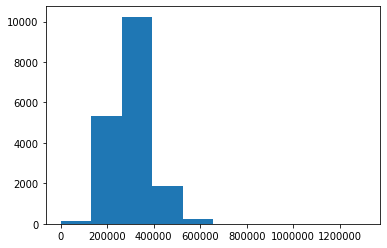

In [50]:
plt.hist(df_small['price'])
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

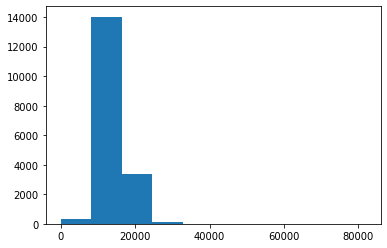

In [52]:
plt.hist(df_small['price_per_m2'])
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

In [43]:
from collections import Counter
from spacy.lang.pl.stop_words import STOP_WORDS

In [54]:
small_descriptions = []
for desc in df_small['description']:
    desc = [x.lower() for x  in desc.split()]
    small_descriptions +=  desc

to_replace = r'0123456789.,/\:;-=!@#$%^&*()_+[]{}|'

desc_clean = []

for token in small_descriptions:
    for repl in list(to_replace):
        token = token.replace(repl, ' ').strip()

    if token not in STOP_WORDS:
        desc_clean.append(token)

c = Counter(desc_clean)
# print(c.most_common)

# NLP

In [45]:
import spacy
import pl_core_news_lg

nlp = pl_core_news_lg.load()



In [57]:
from sklearn.model_selection import train_test_split


train_set, test_set= train_test_split(df, test_size=0.2, random_state=42)
# Decision Tree baseline
# KNN Regression
# Random Forest Regression

print(train_set.head())

          price        date  \
6952     520000  2021-01-21   
126307   799000  2021-03-18   
115055  1630000  2021-03-14   
122932   998000  2021-03-17   
138941   650000  2021-03-24   

                                                    title date_posted  \
6952            3 pokoje, Praga-Południe ul Dwernickiego   2021-01-21   
126307               4 pokoje Praga Południe ul. Igańska   2021-03-18   
115055             Apartament 110m + taras 60m2 ! OKAZJA   2021-03-14   
122932  Mieszkanie Warszawa Śródmieście 60m2 (nr: HH-M...  2021-03-17   
138941  Mieszkanie Warszawa Wilanów 51.04m2 (nr: M-971...  2021-03-24   

       date_scraped                  location   seller property_type  \
6952     2021-01-21  Praga Południe, Warszawa  Agencja    Mieszkanie   
126307   2021-03-18  Praga Południe, Warszawa  Agencja    Mieszkanie   
115055   2021-03-14     Śródmieście, Warszawa  Agencja    Mieszkanie   
122932   2021-03-17     Śródmieście, Warszawa  Agencja    Mieszkanie   
138941   2021-

In [56]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(train_set, test_set)


ValueError: could not convert string to float: '2021-01-21'